## 0) Building TF using tides 

## a) Load data

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import time

from data.data_management import DataManager

config = {"general":{"db_update": False,
                     "output": "telegram/"},
          "strategy": {"instruments":["ftx_BTC/USD",   
                                      "CME_BTC1!",
                                      "SGX_CN1!",
                                      "SGX_TWN1!",
                                      "SGX_SGP1!",
                                      "HKEX_HSI1!",
                                      "HKEX_TCH1!",
                                      "HKEX_ALB1!",
                                      "COMEX_MINI_MGC1!",
                                      "NASDAQ_TSLA",
                                      "NASDAQ_NFLX",
                                      "NYSE_SE",
                                      "CME_MINI_ES1!",
                                      "CME_MINI_NQ1!"
                                      ],
                       "timeframes": ["1h","4h", "24h", "48h"],
                       "indicators": {'tide': {'window': [5,20,67], "sensitivity": [10], "thresholds": [5]},
                                      'mfi': {'length': [14], 'close': ['close']},
                                      'ema': {'length': [14,39,81], 'close': ['close']}
                                      },
                       "resample": True
                      },

          }



data_manager = DataManager(instruments = config["strategy"]["instruments"],
                                update_db = config["general"]["db_update"],
                                timeframes = config["strategy"]["timeframes"],
                                indicators = config["strategy"]["indicators"],
                                resample = config["strategy"]["resample"],
                                )

klines_indicators_dict =  data_manager.load_data()

D:\Users\ShaikRezaShafiq\anaconda3\envs\transformer\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
100%|██████████| 14/14 [00:44<00:00,  3.21s/it]


In [2]:
df0 = klines_indicators_dict["ftx_BTC/USD"].copy()
# df0.drop(columns=list(df0.filter(regex="(^4h)|(^24h)|(^48h)").columns), inplace=True)
df0


,1h_open,1h_high,1h_low,1h_close,1h_volume,1h_closeTime,1h_tide,1h_tide_id,1h_ebb,1h_flow,...,48h_volume,48h_closeTime,48h_tide,48h_tide_id,48h_ebb,48h_flow,48h_MFI_14,48h_EMA_14,48h_EMA_39,48h_EMA_81
date_time,,,,,,,,,,,,,,,,,,,,,
2019-12-02 14:00:00,7308.0,7353.5,7253.0,7288.5,4.545159e+03,1.575295e+09,1.0,439.0,7274.014286,7285.500000,...,1.384326e+06,1.575295e+09,1.0,1.0,7153.000000,7153.000000,44.744113,7306.986081,7362.038747,7413.021798
2019-12-02 15:00:00,7288.5,7331.0,7272.5,7312.0,7.324038e+05,1.575299e+09,1.0,439.0,7274.014286,7285.500000,...,9.765616e+05,1.575299e+09,1.0,1.0,7153.000000,7153.000000,44.796489,7307.654603,7359.536810,7410.557852
2019-12-02 16:00:00,7311.5,7332.5,7259.0,7284.0,5.142354e+05,1.575302e+09,1.0,439.0,7274.014286,7285.500000,...,1.706043e+06,1.575302e+09,1.0,1.0,7153.000000,7153.000000,44.729310,7304.500656,7355.759969,7407.471075
2019-12-02 17:00:00,7283.0,7296.0,7254.5,7284.0,5.663419e+02,1.575306e+09,1.0,439.0,7274.014286,7285.500000,...,2.217453e+06,1.575306e+09,1.0,1.0,7153.000000,7153.000000,44.660626,7301.767236,7352.171971,7404.459585
2019-12-02 18:00:00,7284.0,7284.0,7260.5,7275.0,1.102200e+03,1.575310e+09,-1.0,440.0,7274.014286,7262.742857,...,2.135091e+06,1.575310e+09,1.0,1.0,7153.000000,7153.000000,44.668163,7298.198271,7348.313372,7401.302034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-16 13:00:00,20692.0,20851.0,20680.0,20832.0,1.474757e+07,1.657976e+09,1.0,3367.0,20660.714286,20708.542857,...,7.661306e+08,1.657976e+09,-1.0,206.0,20576.571429,19987.285714,49.723948,20692.116384,20640.030129,20492.095767
2022-07-16 14:00:00,20834.0,20866.0,20733.0,20810.0,8.376408e+06,1.657980e+09,1.0,3367.0,20685.171429,20733.000000,...,7.581994e+08,1.657980e+09,-1.0,206.0,20576.571429,19988.357143,49.878983,20707.834200,20648.528623,20499.849529
2022-07-16 15:00:00,20810.0,20955.0,20808.0,20943.0,9.793380e+06,1.657984e+09,1.0,3367.0,20760.171429,20808.000000,...,7.042614e+08,1.657984e+09,1.0,207.0,20576.571429,21163.714286,50.028906,20739.189640,20663.252192,20510.658077


# 1) Preprocessing

In [14]:
# pip install plotly
# pip install plotly-resampler 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly_resampler import FigureWidgetResampler

class plotly_studies:
    def __init__(self,
                 row_heights: list=[1,2],
                 cols_to_plot = ["index","label"],
                 height: int = 500,
                 width: int = 500
                ):
        self.height = height
        self.width = width
        self.number_subplots = len(cols_to_plot)
        self.row_heights = row_heights
        self.cols_to_plot = cols_to_plot

        self.fig = FigureWidgetResampler(make_subplots(rows=self.number_subplots,
                                                       cols=1, 
                                                       shared_xaxes = True, 
                                                       vertical_spacing = 0.05,
                                                       row_heights = self.row_heights, 
                                                       specs =[[{"type":"scatter"}]]*self.number_subplots,
                                                       #subplot_titles = self.cols_to_plot
                                                      ))
    def build(self,df):
        row=1    
        for col in self.cols_to_plot:
            print(f"plotting: {col}")
            if type(col)==list:
                # Plot these cols in 1 plot
                for col_i in col:
                    ax = go.Scattergl(x=df.index, y=df[col_i],name=col_i)
                    self.fig.append_trace(ax,row=row,col=1)
                row+=1
            elif ("sig" in col) or (len(df[col].unique()) < 5):
                print(f"{col} -> cat data detected")
                ax = go.Scattergl(x=df.index, y=df[col],name=col, mode='markers', marker = dict(size=4))
                self.fig.append_trace(ax,row=row,col=1)
                row+=1
            else:
                # Note: plotly_resampler only supports scattergl so other go objected will not be resampled
                ax = go.Scattergl(x=df.index, y=df[col],name=col)
                self.fig.append_trace(ax,row=row,col=1)
                row+=1

        self.fig.update_layout(autosize=False,width=self.width,height=self.height)
        return self.fig

In [61]:
ps = plotly_studies(cols_to_plot = [["1h_close","1h_ebb","4h_ebb"],["1h_tide","4h_tide"]], row_heights = [0.5,0.5], height=1000,width=1000)
ps.build(df0)

plotting: ['1h_close', '1h_ebb', '4h_ebb']
plotting: ['1h_tide', '4h_tide']


FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> 1h_close <i style="color:#f…

In [8]:
df0.columns

Index(['1h_open', '1h_high', '1h_low', '1h_close', '1h_volume', '1h_closeTime',
       '1h_tide', '1h_tide_id', '1h_ebb', '1h_flow', '1h_MFI_14', '1h_EMA_81',
       '4h_open', '4h_high', '4h_low', '4h_close', '4h_volume', '4h_closeTime',
       '4h_tide', '4h_tide_id', '4h_ebb', '4h_flow', '4h_MFI_14', '4h_EMA_81',
       '24h_open', '24h_high', '24h_low', '24h_close', '24h_volume',
       '24h_closeTime', '24h_tide', '24h_tide_id', '24h_ebb', '24h_flow',
       '24h_MFI_14', '24h_EMA_81', '48h_open', '48h_high', '48h_low',
       '48h_close', '48h_volume', '48h_closeTime', '48h_tide', '48h_tide_id',
       '48h_ebb', '48h_flow', '48h_MFI_14', '48h_EMA_81'],
      dtype='object')

## a) Feature Engineering

In [63]:
# from darts.models import KalmanForecaster
def build_features(df):
    tfs = [i.split("_")[0] for i in list(df.filter(regex="high"))]
    """
    x-y, x-y, x-y, 
    for y in [high, low, close]
    for x in [open, ebb, flow] for all timeframes
    """
    closeTimes = list(df.filter(regex="closeTime").columns)
    tides = list(df.filter(regex="tide$").columns)
    emas = list(df.filter(regex="EMA").columns)
    mfis = list(df.filter(regex="MFI").columns)
    df1 = df[[f"{tf}_close" for tf in tfs] +closeTimes +tides+mfis] .copy() #+emas
    for tide in tides:
        df1[tide] = df1[tide].astype("int")
    for tf in tfs:
        for x in ["high", "low", "close"]:
            for y in ["open", "ebb","flow"]:#, "EMA_14", "EMA_39", "EMA_81"]:
                df1[f"{tf}_{x}_{y}"] = df[f"{tf}_{x}"] - df[f"{tf}_{y}"]
                
    return df1
df1 = build_features(df0)    
        

In [64]:
df1

,1h_close,4h_close,24h_close,48h_close,1h_closeTime,4h_closeTime,24h_closeTime,48h_closeTime,1h_tide,4h_tide,...,24h_close_flow,48h_high_open,48h_high_ebb,48h_high_flow,48h_low_open,48h_low_ebb,48h_low_flow,48h_close_open,48h_close_ebb,48h_close_flow
date_time,,,,,,,,,,,,,,,,,,,,,
2019-12-02 14:00:00,7288.5,7288.5,7288.5,7288.5,1.575295e+09,1.575295e+09,1.575295e+09,1.575295e+09,1,-1,...,-156.000000,50.0,462.500000,462.500000,-412.5,0.000000,0.000000,-277.0,135.500000,135.500000
2019-12-02 15:00:00,7312.0,7312.0,7312.0,7312.0,1.575299e+09,1.575299e+09,1.575299e+09,1.575299e+09,1,-1,...,-132.500000,66.5,462.500000,462.500000,-396.0,0.000000,0.000000,-237.0,159.000000,159.000000
2019-12-02 16:00:00,7284.0,7284.0,7284.0,7284.0,1.575302e+09,1.575302e+09,1.575302e+09,1.575302e+09,1,-1,...,-160.500000,0.0,447.500000,447.500000,-447.5,0.000000,0.000000,-316.5,131.000000,131.000000
2019-12-02 17:00:00,7284.0,7284.0,7284.0,7284.0,1.575306e+09,1.575306e+09,1.575306e+09,1.575306e+09,1,-1,...,-160.500000,86.5,416.500000,416.500000,-330.0,0.000000,0.000000,-199.0,131.000000,131.000000
2019-12-02 18:00:00,7275.0,7275.0,7275.0,7275.0,1.575310e+09,1.575310e+09,1.575310e+09,1.575310e+09,-1,-1,...,-169.500000,83.0,416.500000,416.500000,-333.5,0.000000,0.000000,-211.5,122.000000,122.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-16 13:00:00,20832.0,20832.0,20832.0,20832.0,1.657976e+09,1.657976e+09,1.657976e+09,1.657976e+09,1,-1,...,239.714286,1443.0,614.428571,1203.714286,-88.0,-916.571429,-327.285714,1084.0,255.428571,844.714286
2022-07-16 14:00:00,20810.0,20810.0,20810.0,20810.0,1.657980e+09,1.657980e+09,1.657980e+09,1.657980e+09,1,-1,...,217.714286,1314.0,614.428571,1202.642857,0.0,-699.571429,-111.357143,933.0,233.428571,821.642857
2022-07-16 15:00:00,20943.0,20943.0,20943.0,20943.0,1.657984e+09,1.657984e+09,1.657984e+09,1.657984e+09,1,-1,...,350.714286,813.0,614.428571,27.285714,-237.0,-435.571429,-1022.714286,565.0,366.428571,-220.714286


In [235]:
ps = plotly_studies(cols_to_plot = ["1h_close",["24h_close_ebb","48h_close_ebb"], ["48h_tide"], ["24h_MFI_14"]], row_heights = [1,1,1,1], height=1000,width=1000)
ps.build(df1)

plotting: 1h_close
plotting: ['24h_close_ebb', '48h_close_ebb']
plotting: ['48h_tide']
plotting: ['24h_MFI_14']


FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> 1h_close <i style="color:#f…

## b) Build labels

In [66]:
from strategy.labels import calc_triple_barrier
df_labelled = calc_triple_barrier(df1,
                                  col_series="1h_close",
                                  col_timestamps = "1h_closeTime",
                                  horizon_delta = 4,
                                  vol_span = 24,
                                  upper_z = 2,
                                  lower_z = -2)



22972it [00:09, 2311.20it/s]


In [7]:
df_labelled

,1h_close,4h_close,24h_close,48h_close,1h_closeTime,4h_closeTime,24h_closeTime,48h_closeTime,1h_tide,4h_tide,...,48h_high_flow,48h_low_open,48h_low_ebb,48h_low_flow,48h_close_open,48h_close_ebb,48h_close_flow,t,t1,label
date_time,,,,,,,,,,,,,,,,,,,,,
2019-12-02 14:00:00,7288.5,7288.5,7288.5,7288.5,1.575295e+09,1.575295e+09,1.575295e+09,1.575295e+09,1,-1,...,462.500000,-412.5,0.000000,0.000000,-277.0,135.500000,135.500000,1.575295e+09,1.575324e+09,0.0
2019-12-02 15:00:00,7312.0,7312.0,7312.0,7312.0,1.575299e+09,1.575299e+09,1.575299e+09,1.575299e+09,1,-1,...,462.500000,-396.0,0.000000,0.000000,-237.0,159.000000,159.000000,1.575299e+09,1.575302e+09,-1.0
2019-12-02 16:00:00,7284.0,7284.0,7284.0,7284.0,1.575302e+09,1.575302e+09,1.575302e+09,1.575302e+09,1,-1,...,447.500000,-447.5,0.000000,0.000000,-316.5,131.000000,131.000000,1.575302e+09,1.575320e+09,1.0
2019-12-02 17:00:00,7284.0,7284.0,7284.0,7284.0,1.575306e+09,1.575306e+09,1.575306e+09,1.575306e+09,1,-1,...,416.500000,-330.0,0.000000,0.000000,-199.0,131.000000,131.000000,1.575306e+09,1.575320e+09,1.0
2019-12-02 18:00:00,7275.0,7275.0,7275.0,7275.0,1.575310e+09,1.575310e+09,1.575310e+09,1.575310e+09,-1,-1,...,416.500000,-333.5,0.000000,0.000000,-211.5,122.000000,122.000000,1.575310e+09,1.575317e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-16 13:00:00,20832.0,20832.0,20832.0,20832.0,1.657976e+09,1.657976e+09,1.657976e+09,1.657976e+09,1,-1,...,1203.714286,-88.0,-916.571429,-327.285714,1084.0,255.428571,844.714286,1.657976e+09,1.657984e+09,1.0
2022-07-16 14:00:00,20810.0,20810.0,20810.0,20810.0,1.657980e+09,1.657980e+09,1.657980e+09,1.657980e+09,1,-1,...,1202.642857,0.0,-699.571429,-111.357143,933.0,233.428571,821.642857,1.657980e+09,1.657984e+09,1.0
2022-07-16 15:00:00,20943.0,20943.0,20943.0,20943.0,1.657984e+09,1.657984e+09,1.657984e+09,1.657984e+09,1,-1,...,27.285714,-237.0,-435.571429,-1022.714286,565.0,366.428571,-220.714286,1.657984e+09,1.657987e+09,1.0


<AxesSubplot:>

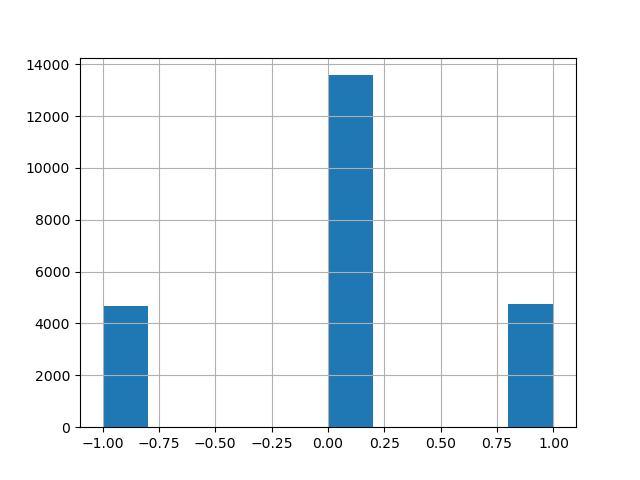

In [67]:
%matplotlib widget
df_labelled["label"].hist()

In [68]:
ps = plotly_studies(cols_to_plot = [["1h_tide", "4h_tide"],"1h_close","label"], row_heights = [1,3,1], height=1000,width=1000)
ps.build(df_labelled["2021-01-01":"2021-02-01"])

plotting: ['1h_tide', '4h_tide']
plotting: 1h_close
plotting: label
label -> cat data detected


FigureWidgetResampler({
    'data': [{'name': '1h_tide',
              'type': 'scattergl',
              'uid…

In [27]:
df_labelled

,1h_close,4h_close,24h_close,48h_close,1h_closeTime,4h_closeTime,24h_closeTime,48h_closeTime,1h_tide,4h_tide,...,48h_high_flow,48h_low_open,48h_low_ebb,48h_low_flow,48h_close_open,48h_close_ebb,48h_close_flow,t,t1,label
date_time,,,,,,,,,,,,,,,,,,,,,
1970-01-19 05:34:55.200,7288.5,7288.5,7288.5,7288.5,1.575295e+09,1.575295e+09,1.575295e+09,1.575295e+09,1,-1,...,462.500000,-412.5,0.000000,0.000000,-277.0,135.500000,135.500000,1.575295e+09,1.575324e+09,0.0
1970-01-19 05:34:58.800,7312.0,7312.0,7312.0,7312.0,1.575299e+09,1.575299e+09,1.575299e+09,1.575299e+09,1,-1,...,462.500000,-396.0,0.000000,0.000000,-237.0,159.000000,159.000000,1.575299e+09,1.575302e+09,-1.0
1970-01-19 05:35:02.400,7284.0,7284.0,7284.0,7284.0,1.575302e+09,1.575302e+09,1.575302e+09,1.575302e+09,1,-1,...,447.500000,-447.5,0.000000,0.000000,-316.5,131.000000,131.000000,1.575302e+09,1.575320e+09,1.0
1970-01-19 05:35:06.000,7284.0,7284.0,7284.0,7284.0,1.575306e+09,1.575306e+09,1.575306e+09,1.575306e+09,1,-1,...,416.500000,-330.0,0.000000,0.000000,-199.0,131.000000,131.000000,1.575306e+09,1.575320e+09,1.0
1970-01-19 05:35:09.600,7275.0,7275.0,7275.0,7275.0,1.575310e+09,1.575310e+09,1.575310e+09,1.575310e+09,-1,-1,...,416.500000,-333.5,0.000000,0.000000,-211.5,122.000000,122.000000,1.575310e+09,1.575317e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-20 04:32:56.400,20832.0,20832.0,20832.0,20832.0,1.657976e+09,1.657976e+09,1.657976e+09,1.657976e+09,1,-1,...,1203.714286,-88.0,-916.571429,-327.285714,1084.0,255.428571,844.714286,1.657976e+09,1.657984e+09,1.0
1970-01-20 04:33:00.000,20810.0,20810.0,20810.0,20810.0,1.657980e+09,1.657980e+09,1.657980e+09,1.657980e+09,1,-1,...,1202.642857,0.0,-699.571429,-111.357143,933.0,233.428571,821.642857,1.657980e+09,1.657984e+09,1.0
1970-01-20 04:33:03.600,20943.0,20943.0,20943.0,20943.0,1.657984e+09,1.657984e+09,1.657984e+09,1.657984e+09,1,-1,...,27.285714,-237.0,-435.571429,-1022.714286,565.0,366.428571,-220.714286,1.657984e+09,1.657987e+09,1.0


In [26]:
res0

,1h_close,4h_close,24h_close,48h_close,1h_closeTime,4h_closeTime,24h_closeTime,48h_closeTime,1h_tide,4h_tide,...,48h_low_flow,48h_close_open,48h_close_ebb,48h_close_flow,t,t1,label,returns,position,strategy
date_time,,,,,,,,,,,,,,,,,,,,,
1970-01-19 05:34:55.200,7288.5,7288.5,7288.5,7288.5,1.575295e+09,1.575295e+09,1.575295e+09,1.575295e+09,1,-1,...,0.000000,-277.0,135.500000,135.500000,1.575295e+09,1.575324e+09,0.0,NaN,0.0,NaN
1970-01-19 05:34:58.800,7312.0,7312.0,7312.0,7312.0,1.575299e+09,1.575299e+09,1.575299e+09,1.575299e+09,1,-1,...,0.000000,-237.0,159.000000,159.000000,1.575299e+09,1.575302e+09,-1.0,1.003224,-1.0,9.999000e-01
1970-01-19 05:35:02.400,7284.0,7284.0,7284.0,7284.0,1.575302e+09,1.575302e+09,1.575302e+09,1.575302e+09,1,-1,...,0.000000,-316.5,131.000000,131.000000,1.575302e+09,1.575320e+09,1.0,0.999383,1.0,1.003543e+00
1970-01-19 05:35:06.000,7284.0,7284.0,7284.0,7284.0,1.575306e+09,1.575306e+09,1.575306e+09,1.575306e+09,1,-1,...,0.000000,-199.0,131.000000,131.000000,1.575306e+09,1.575320e+09,1.0,0.999383,1.0,1.003543e+00
1970-01-19 05:35:09.600,7275.0,7275.0,7275.0,7275.0,1.575310e+09,1.575310e+09,1.575310e+09,1.575310e+09,-1,-1,...,0.000000,-211.5,122.000000,122.000000,1.575310e+09,1.575317e+09,1.0,0.998148,1.0,1.002303e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-20 04:32:56.400,20832.0,20832.0,20832.0,20832.0,1.657976e+09,1.657976e+09,1.657976e+09,1.657976e+09,1,-1,...,-327.285714,1084.0,255.428571,844.714286,1.657976e+09,1.657984e+09,1.0,2.858201,1.0,3.222562e+32
1970-01-20 04:33:00.000,20810.0,20810.0,20810.0,20810.0,1.657980e+09,1.657980e+09,1.657980e+09,1.657980e+09,1,-1,...,-111.357143,933.0,233.428571,821.642857,1.657980e+09,1.657984e+09,1.0,2.855183,1.0,3.219159e+32
1970-01-20 04:33:03.600,20943.0,20943.0,20943.0,20943.0,1.657984e+09,1.657984e+09,1.657984e+09,1.657984e+09,1,-1,...,-1022.714286,565.0,366.428571,-220.714286,1.657984e+09,1.657987e+09,1.0,2.873431,1.0,3.239733e+32


Number of trades: 269, MDD: -1.453


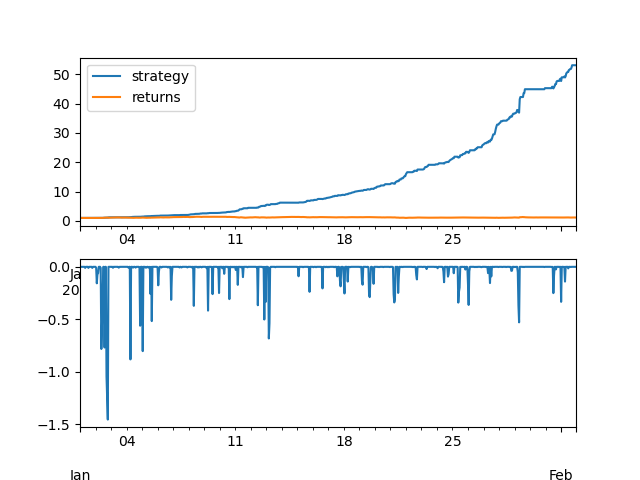

In [69]:
%matplotlib widget
from backtest.backtest import vectorised_backtest
res0 = vectorised_backtest(df_labelled["2021-01-01":"2021-02-01"]) #["2021-01-01":"2021-02-01"]

Number of trades: 2526, MDD: -0.262


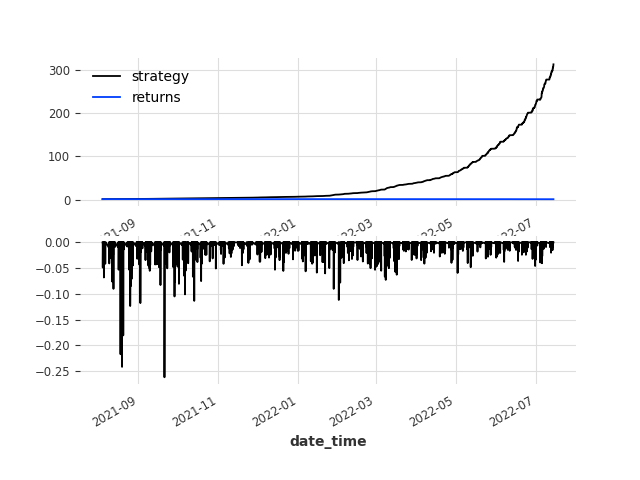

In [314]:
%matplotlib widget
from backtest.backtest import vectorised_backtest
res0 = vectorised_backtest(df_labelled) #["2021-01-01":"2021-02-01"]

In [25]:
res0[["position","strategy"]].head(20)

,position,strategy
date_time,,
1970-01-19 05:34:55.200,0.0,NaN
1970-01-19 05:34:58.800,-1.0,0.999900
1970-01-19 05:35:02.400,1.0,1.003543
1970-01-19 05:35:06.000,1.0,1.003543
1970-01-19 05:35:09.600,1.0,1.002303
1970-01-19 05:35:13.200,1.0,1.003267
1970-01-19 05:35:16.800,1.0,1.005058
1970-01-19 05:35:20.400,1.0,1.007469
1970-01-19 05:35:24.000,-1.0,1.010092


In [149]:
df0

,1h_open,1h_high,1h_low,1h_close,1h_volume,1h_closeTime,1h_tide,1h_tide_id,1h_ebb,1h_flow,...,48h_low,48h_close,48h_volume,48h_closeTime,48h_tide,48h_tide_id,48h_ebb,48h_flow,48h_MFI_14,48h_EMA_81
date_time,,,,,,,,,,,,,,,,,,,,,
2021-08-04 16:15:00,1531.25,1531.50,1530.00,1530.25,295.0,1.628094e+09,-1.0,396.0,1531.000000,1530.250000,...,1503.50,1530.25,87895.0,1.628094e+09,1.0,1.0,1503.500000,1503.500000,52.553032,1515.242219
2021-08-04 17:15:00,1530.25,1532.75,1530.00,1532.75,717.0,1.628097e+09,-1.0,396.0,1531.000000,1530.250000,...,1507.25,1532.75,82549.0,1.628097e+09,1.0,1.0,1507.250000,1507.250000,52.693151,1515.669239
2021-08-04 18:15:00,1532.75,1533.75,1532.50,1533.00,610.0,1.628101e+09,1.0,397.0,1531.792857,1532.500000,...,1509.25,1533.00,75586.0,1.628101e+09,1.0,1.0,1509.250000,1509.250000,52.827709,1516.091940
2021-08-04 19:15:00,1533.00,1533.00,1531.00,1531.00,260.0,1.628104e+09,1.0,397.0,1531.792857,1532.500000,...,1509.25,1531.00,73353.0,1.628104e+09,1.0,1.0,1509.250000,1509.250000,52.863040,1516.455551
2021-08-04 20:15:00,1531.25,1532.00,1530.25,1531.75,527.0,1.628108e+09,-1.0,398.0,1531.792857,1531.085714,...,1509.25,1531.75,72738.0,1.628108e+09,1.0,1.0,1509.250000,1509.250000,52.994333,1516.828587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-14 04:15:00,1241.00,1241.00,1239.00,1241.00,214.0,1.657772e+09,1.0,1067.0,1238.971429,1239.935714,...,1201.75,1241.00,127673.0,1.657772e+09,-1.0,36.0,1253.428571,1239.428571,43.577064,1234.428329
2022-07-14 08:15:00,1233.75,1235.00,1224.75,1232.00,7960.0,1.657786e+09,-1.0,1068.0,1235.964286,1235.000000,...,1201.75,1232.00,126507.0,1.657786e+09,-1.0,36.0,1253.428571,1239.428571,43.577609,1234.369101
2022-07-14 09:15:00,1231.75,1244.50,1230.00,1244.25,9643.0,1.657790e+09,-1.0,1068.0,1235.964286,1234.678571,...,1201.75,1244.25,133417.0,1.657790e+09,-1.0,36.0,1253.428571,1239.428571,43.578164,1234.610099


## c) Catboost for feature selection

TOTAL window: 2019-12-02 14:00:00 ----> 2022-07-16 17:00:00, len: 22972
TRAIN window: 2020-01-01 00:00:00 ----> 2021-06-30 23:00:00, len: 13128
TEST window: 2021-07-01 00:00:00 ----> 2021-07-02 23:00:00, len: 48
features: 
['1h_tide', '4h_tide', '24h_tide', '48h_tide', '1h_MFI_14', '4h_MFI_14', '24h_MFI_14', '48h_MFI_14', '1h_high_ebb', '1h_high_flow', '1h_low_ebb', '1h_low_flow', '1h_close_ebb', '1h_close_flow', '4h_high_ebb', '4h_high_flow', '4h_low_ebb', '4h_low_flow', '4h_close_ebb', '4h_close_flow', '24h_high_ebb', '24h_high_flow', '24h_low_ebb', '24h_low_flow', '24h_close_ebb', '24h_close_flow', '48h_high_ebb', '48h_high_flow', '48h_low_ebb', '48h_low_flow', '48h_close_ebb', '48h_close_flow'] 

 cat_features: 
['1h_tide', '4h_tide', '24h_tide', '48h_tide']


<AxesSubplot:xlabel='date_time'>

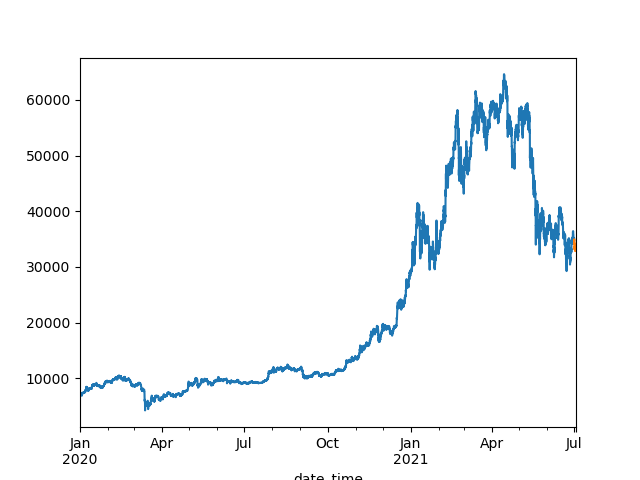

In [126]:
%matplotlib widget
from catboost import CatBoostClassifier
train_window = ["2020-01-01","2021-06-30"]
test_window = ["2021-07-01","2021-07-2"]
iterations = 1000

df = df_labelled.drop(columns=['t', 't1']).copy()
# df= df.filter(regex="(1h)|(label)")
cat_features = list(df.filter(regex="tide$"))
# ensure cat features are str/int not float
df[cat_features] = df[cat_features].astype(int)
features = list(df.filter(regex="(tide$)|(ebb)|(flow)|(MFI)|(EMA)"))
labels = ["label"]

df_train= df[train_window[0]:train_window[1]].copy()
df_test = df[test_window[0]:test_window[1]].copy()

print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
print(f"TRAIN window: {df_train.index[0]} ----> {df_train.index[-1]}, len: {len(df_train)}")
print(f"TEST window: {df_test.index[0]} ----> {df_test.index[-1]}, len: {len(df_test)}")

print(f"features: \n{features} \n\n cat_features: \n{cat_features}")
df_train["1h_close"].plot()
df_test["1h_close"].plot()

In [127]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(task_type="GPU",iterations=iterations)
model.fit(X=df_train[features], y=df_train[labels],cat_features = cat_features, verbose=False,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

IST Model Accuracy:  0.9124771480804388
OST Model Accuracy:  0.5
                       0
4h_MFI_14       6.852922
48h_MFI_14      6.820879
1h_MFI_14       6.097451
24h_MFI_14      5.872913
24h_high_flow   4.879797
48h_high_flow   4.531111
24h_low_flow    4.196177
24h_low_ebb     3.911595
48h_low_ebb     3.877428
48h_low_flow    3.630863
4h_low_ebb      3.609059
4h_high_flow    3.430394
4h_low_flow     3.365451
24h_high_ebb    3.280170
48h_high_ebb    3.254660
4h_high_ebb     3.243678
24h_close_flow  2.966829
48h_close_flow  2.922634
48h_close_ebb   2.740931
24h_close_ebb   2.657481
4h_close_flow   2.341778
1h_low_flow     2.225208
1h_low_ebb      2.212422
4h_close_ebb    2.170106
1h_close_flow   1.968274
1h_close_ebb    1.956047
1h_high_ebb     1.821057
1h_high_flow    1.734552
48h_tide        0.594547
1h_tide         0.373406
4h_tide         0.249011
24h_tide        0.211169
Empty DataFrame
Columns: [0]
Index: []


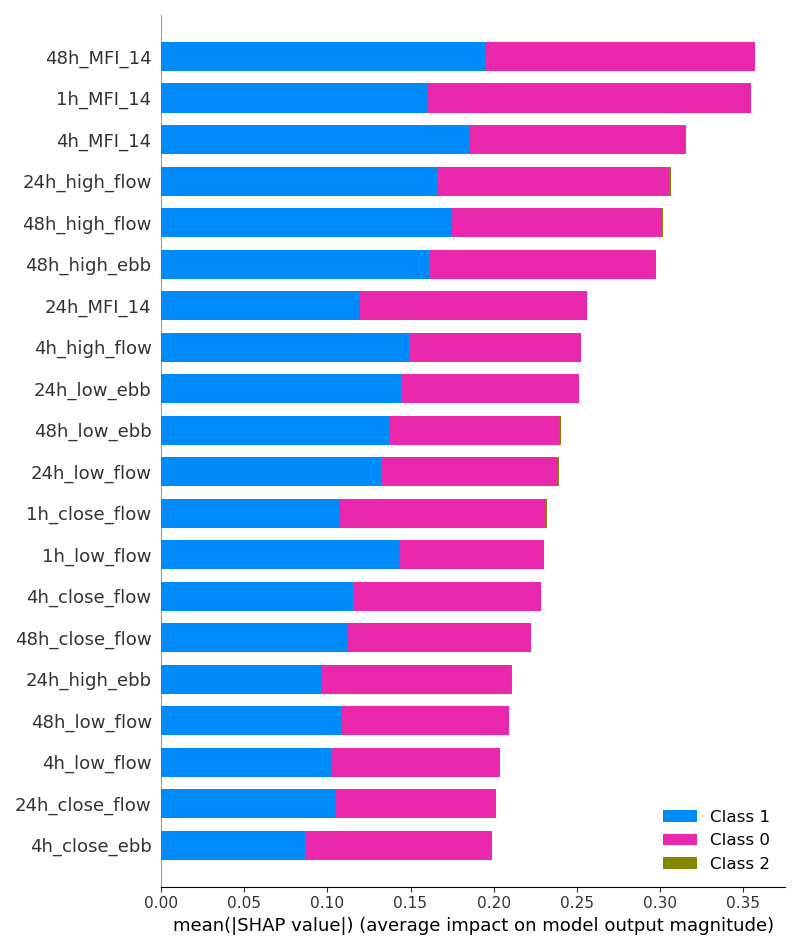

In [128]:
%matplotlib widget
from sklearn.metrics import accuracy_score
import shap


def calc_accuracy(model, features,cat_features, labels, df_train,df_test, feature_importances=False):
    train_y_pred = model.predict(df_train[features])
    print("IST Model Accuracy: ", accuracy_score(df_train[labels], train_y_pred))
    
    train_y_pred = model.predict(df_train[features])
    train_y_probs = model.predict_proba(df_train[features])
    
    test_y_pred = model.predict(df_test[features])
    test_y_probs = model.predict_proba(df_test[features])
    
    print("OST Model Accuracy: ", accuracy_score(df_test[labels], test_y_pred))
    
    if feature_importances:
        df_fi = pd.DataFrame(model.feature_importances_, index=df_train[features].columns, ).sort_values(by=0,ascending=False)
        fi_top = df_fi[df_fi>0.0].dropna()
        print(fi_top)
        fi_bot = df_fi[df_fi==0.0].dropna()
        print(fi_bot)
        
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(Pool(df_train[features], df_train[labels], cat_features=cat_features))
#         shap.summary_plot(shap_values, df_train[features], plot_type="bar")
        shap.summary_plot(shap_values, df_train[features])
    return test_y_pred,test_y_probs,train_y_pred,train_y_probs

test_y_pred,test_y_probs,train_y_pred,train_y_probs = calc_accuracy(model, features,cat_features, labels, df_train,df_test,feature_importances=True)

Number of trades: 3020 trades over 13128hrs -> ave trades: 4.347019867549669hours between trade


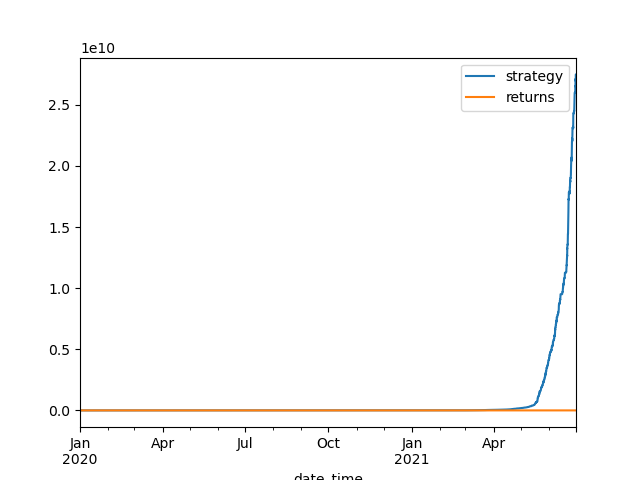

In [122]:
df_backtest = df_train.copy() 
df_backtest["Y"] = train_y_pred
df_backtest[["d","s","u"]] = train_y_probs
%matplotlib widget
def vectorised_backtest(df,fee=0.0001, holding_period=10):
    df1=df.copy()
    df1["returns"] = np.log(df1['1h_close'] / df1['1h_close'].shift(1))

    # long only
    df1["position"] = df_backtest["Y"]#np.where(df1["u"]>0.9,1,0) #+ np.where(df1["d"]>0.5,-1,0) 
#     df1["position"] =  np.where(df1["u"]>0.6,1,0) + np.where(df1["d"]>0.6,-1,0) 

    df1["strategy"] = df1["position"].shift(1) * df1["returns"] - abs(df1["position"].diff()).fillna(0)*fee
    df1[["strategy","returns"]]=df1[["strategy","returns"]].cumsum().apply(np.exp)
    df1[["strategy","returns"]].plot()
    no_trades = abs(df1["position"].diff().dropna()).astype(int).sum()
    print(f"Number of trades: {no_trades} trades over {len(df1)}hrs -> ave trades: {len(df1)/no_trades}hours between trade")
    return df1
res1 = vectorised_backtest(df_backtest, fee=0.001) #["2021-01-01":"2021-02-01"]

Number of trades: 21 trades over 48hrs -> ave trades: 2.2857142857142856hours between trade


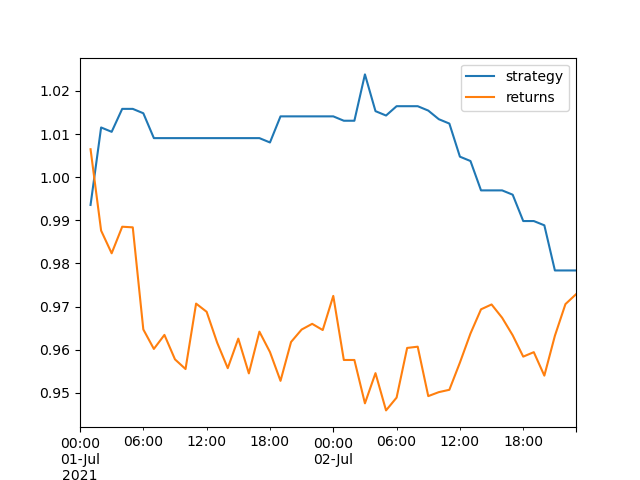

In [129]:
df_backtest = df_test.copy() 
df_backtest["Y"] = test_y_pred
df_backtest[["d","s","u"]] = test_y_probs
%matplotlib widget
def vectorised_backtest(df,fee=0.0001, holding_period=10):
    df1=df.copy()
    df1["returns"] = np.log(df1['1h_close'] / df1['1h_close'].shift(1))

    # long only
    df1["position"] = df_backtest["Y"]#np.where(df1["u"]>0.9,1,0) #+ np.where(df1["d"]>0.5,-1,0) 
#     df1["position"] =  np.where(df1["u"]>0.6,1,0) + np.where(df1["d"]>0.6,-1,0) 

    df1["strategy"] = df1["position"].shift(1) * df1["returns"] - abs(df1["position"].diff()).fillna(0)*fee
    df1[["strategy","returns"]]=df1[["strategy","returns"]].cumsum().apply(np.exp)
    df1[["strategy","returns"]].plot()
    no_trades = abs(df1["position"].diff().dropna()).astype(int).sum()
    print(f"Number of trades: {no_trades} trades over {len(df1)}hrs -> ave trades: {len(df1)/no_trades}hours between trade")
    return df1
res1 = vectorised_backtest(df_backtest, fee=0.001) #["2021-01-01":"2021-02-01"]

<AxesSubplot:>

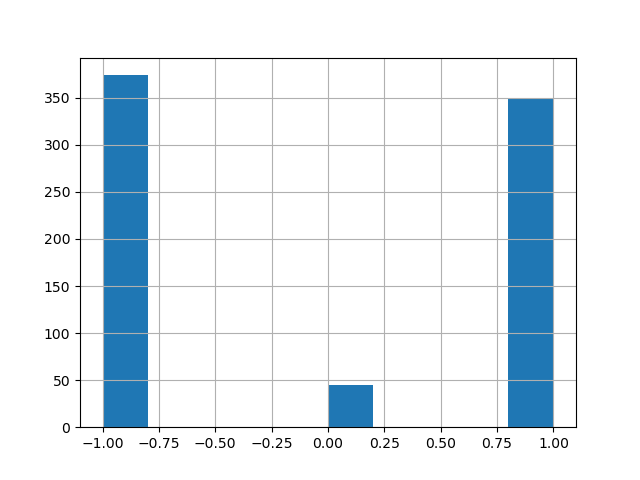

In [41]:
%matplotlib widget
res1["Y"].hist()

In [130]:
ps = plotly_studies(cols_to_plot = ['label',"1h_close",["Y","d","u"]], row_heights = [1,1,1], height=1000,width=1000)
ps.build(res1)

plotting: label
label -> cat data detected
plotting: 1h_close
plotting: ['Y', 'd', 'u']


FigureWidgetResampler({
    'data': [{'marker': {'size': 4},
              'mode': 'markers',
              'n…

# 2) Ensemble Catboost 
Here we predict for all timeframes individually, and use those labels as inputs for final classifier            
Questions:
- all use same label?
        
Architecture:
 - t0-> t   train each tf ta to get tf feature, model_tf
 - t0-> t   train tfs features + tf ta to get model_T
 - t -> t+x train each tf ta to get tf feature
 - t -> t+x model.pred(tf features, tf ta

In [74]:
df2.columns

Index(['4h_close', '5h_close', '6h_close', '7h_close', '8h_close', '9h_close',
       '10h_close', '11h_close', '12h_close', '4h_tide',
       ...
       '12h_open_close', '12h_ebb_high', '12h_ebb_low', '12h_ebb_close',
       '12h_flow_high', '12h_flow_low', '12h_flow_close', 'threshold', 't1',
       'label'],
      dtype='object', length=102)

In [112]:
from catboost import CatBoostClassifier
def run_classifier(df,timeframe="all", sample=0.5):
        
    df0=df.copy()
    
    n = int(len(df0)*sample)
    iterations = 100
    
    if timeframe == "all":
        timeframes =np.unique([tf.split("_")[0] for tf in df0.filter(regex="h_open").columns])
        print(timeframes)
    else:
        timeframes = [timeframe]
    df0 = df0.drop(columns=["threshold", "t1"])
    df_train_tide2 = pd.DataFrame()
    df_train_tide2.index = df0.index[:n]
    
    df_test_tide2 = pd.DataFrame()
    df_test_tide2.index = df0.index[n:]
    
    models = {}
    for tf in timeframes:
        print(f"Getting tide2 {tf}")
        df_t = df0.copy().filter(regex=f"{tf}|(label)")
        df_t = df_t.drop(columns=[f"{tf}_close"])

        df_train_t = df_t.iloc[:n,:].copy()
        df_test_t = df_t.iloc[n:,:].copy()

        cat_features_t = list(df_train_t.filter(regex="tide"))
        features_t = list(df_train_t.columns)[:-1]
        labels = ["label"]

        model_t = CatBoostClassifier(task_type="GPU",iterations=iterations)
        model_t.fit(X=df_train_t[features_t], y=df_train_t[labels],cat_features = cat_features_t, verbose=False,plot=False)
        models[tf] = model_t
        
        train_tide2 = model_t.predict(df_train_t[features_t])
        test_tide2 = model_t.predict(df_test_t[features_t])
        
        df_train_tide2[f"{tf}_tide2"] = train_tide2
        df_test_tide2[f"{tf}_tide2"] = test_tide2
        
    # Final fit using train pred
    print(f"Preparing for Final FIT")
    df_T = df0.drop(columns=list(df0.filter(regex="h_close").columns))
    df_tide2 = pd.concat([df_train_tide2,df_test_tide2])
    df_T = pd.merge(df_T, df_tide2, right_index=True, left_index=True, how="left")
    
    for tide2 in df_train_tide2.columns:
        try:
            df_T[tide2] = df_T[tide2].astype("int")
        except Exception as e:
            print(e)
            return {"df_T":df_T,"df_tide2":df_tide2 }
        
    df_train_T = df_T.iloc[:n,:].copy()
    df_test_T = df_T.iloc[n:,:].copy()

    cat_features_T = list(df_train_T.filter(regex="(tide)|(h_pred)"))
    features_T = list(df_train_T.drop(columns=["label"]).columns)
    labels = ["label"]
    
    print("FITTING FINAL MODEL")

    model_T = CatBoostClassifier(task_type="GPU",iterations=iterations)
    model_T.fit(X=df_train_T[features_T], y=df_train_T[labels],cat_features = cat_features_T, verbose=False,plot=False) ### 
    
    train_y_pred = calc_accuracy(model_T, features_T, labels, df_train_T,df_test_T)
    return {"model":model_T, "df_T":df_T,"df_tide2":df_tide2 }

In [113]:
res = run_classifier(df2,timeframe="all")

['10h' '11h' '12h' '4h' '5h' '6h' '7h' '8h' '9h']
Getting tide2 10h
Getting tide2 11h
Getting tide2 12h
Getting tide2 4h
Getting tide2 5h
Getting tide2 6h
Getting tide2 7h
Getting tide2 8h
Getting tide2 9h
Preparing for Final FIT
FITTING FINAL MODEL
IST Model Accuracy:  0.9937749003984063
OST Model Accuracy:  0.48892208115509084


In [114]:
res["df_T"]

,4h_tide,5h_tide,6h_tide,7h_tide,8h_tide,9h_tide,10h_tide,11h_tide,12h_tide,4h_open_high,...,label,10h_tide2,11h_tide2,12h_tide2,4h_tide2,5h_tide2,6h_tide2,7h_tide2,8h_tide2,9h_tide2
date_time,,,,,,,,,,,,,,,,,,,,,
2021-01-06 23:15:00,1,1,1,1,1,1,1,1,1,-4.00,...,1.0,1,1,1,0,1,1,1,0,0
2021-01-07 00:15:00,1,1,1,1,1,1,1,1,1,-8.50,...,1.0,1,1,0,1,1,1,0,0,0
2021-01-07 01:15:00,1,1,1,1,1,1,1,1,1,-9.50,...,1.0,1,1,0,0,1,0,0,0,1
2021-01-07 02:15:00,1,1,1,1,1,1,1,1,1,-6.75,...,0.0,0,0,0,0,0,0,0,0,0
2021-01-07 03:15:00,1,1,1,1,1,1,1,1,1,-6.50,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27 09:15:00,1,1,1,1,1,1,1,1,1,-7.50,...,-1.0,0,0,0,0,0,0,0,0,-1
2022-06-27 10:15:00,1,1,1,1,1,1,1,1,1,-10.50,...,-1.0,0,0,0,0,0,0,0,0,0
2022-06-27 11:15:00,1,1,1,1,1,1,1,1,1,-15.25,...,-1.0,0,0,0,0,0,0,0,0,0


## a) abstraction

In [ ]:
tf = "4h"

In [ ]:
df0=df2.copy()
    
n = int(len(df0)*0.7)
iterations = 100

df0 = df0.drop(columns=["threshold", "t1"])
df_train_pred = pd.DataFrame()
df_train_pred.index = df0.index[:n]

df_test_pred = pd.DataFrame()
df_test_pred.index = df0.index[:n]
# for tf in timeframes:
tf= "4h"

df_t = df0.copy().filter(regex=f"{tf}|(label)")
df_t = df_t.drop(columns=[f"{tf}_close"])

df_train_t = df_t.iloc[:n,:].copy()
df_test_t = df_t.iloc[n:,:].copy()

cat_features_t = list(df_train_t.filter(regex="tide"))
features_t = list(df_train_t.columns)[:-1]
labels = ["label"]

model = CatBoostClassifier(task_type="GPU",iterations=iterations)
model.fit(X=df_train_t[features_t], y=df_train_t[labels],cat_features = cat_features_t, verbose=False,plot=False)


print(f"{tf} ACCURACY ========")
train_y_pred = calc_accuracy(model, features_t, labels, df_train_t,df_test_t)
df_train_pred[f"{tf}_pred"] = train_y_pred
    

# 3) Cross validation
Here we seek to improve the model by including cross validation instead of a single train test to validate the model across a rolling timeframe. We also employ catboost instead of xgboost due to the inherent abundance of categorical data in the dataset the paper works in. The model thus aims to produce allocation metrices using the probabilities predicted for each label (up down sideways next time step movement of the VBTX) We will then study the predicted values and see if its any use

The model walks forward on an anchored expanding window setting to predict the future VXBT state (-1,0,1). The parameters involved in this cross validation are 
 - retrain_after_x_minutes: dictates the time elapsed before retraining the model
 - test_size : prediction window, for eg, currently set at 12 meaning, aside from predicting the next timestep t+5m, it will also predict for t+10m,t+15m ... t+60m using data available at t
 - output_size_desired is to start predicting from df.tail(80000) onwards
 - iterations is a boosting related parameter but we set at 100 as a start

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

from sklearn.utils import indexable
from sklearn.utils.validation import _num_samples

class TimeSeriesSplitCustom(TimeSeriesSplit):
    def __init__(self, n_splits=5, max_train_size=None,
                 test_size=1,
                 min_train_size=1,
                 output_size_desired=1000,
                 tail_start = True):
        super().__init__(n_splits=n_splits, max_train_size=max_train_size)
        self.test_size = test_size
        self.min_train_size = min_train_size
        self.tail_start = tail_start
        self.output_size_desired = output_size_desired

    def overlapping_split(self, X, y=None, groups=None):
        min_train_size = self.min_train_size
        test_size = self.test_size

        n_splits = self.n_splits
        n_samples = _num_samples(X)
        # print(f"to trigger TimeSeriesSplitCustom: {(n_samples - min_train_size) / test_size} >= {n_splits} must be false")
        if (n_samples - min_train_size) / test_size >= n_splits:
            print('(n_samples -  min_train_size) / test_size >= n_splits')
            print('default TimeSeriesSplit.split() used')
            yield from super().split(X)

        else:
            print("Using TimeSeriesSplitCustom")
            shift = int(np.floor((n_samples - test_size - min_train_size) / (n_splits - 1)))

            # start_test = n_samples - (n_splits * shift + test_size - shift)
            if self.tail_start:
                start_test = n_samples - output_size_desired
                end_test = n_samples
                print(f"index start: {start_test}, index end: {end_test}")
            else:
                start_test = min_train_size
                end_test = min_train_size + self.output_size_desired
                print(f"index start: {start_test}, index end: {end_test}")
                
            # test_starts = range(start_test, n_samples - test_size + 1, shift)
            test_starts = range(start_test, end_test, shift)

            if start_test < min_train_size:
                raise ValueError(
                    ("The start of the testing : {0} is smaller"
                     " than the minimum training samples: {1}.").format(start_test,
                                                                        min_train_size))

            indices = np.arange(n_samples)

            for test_start in test_starts:
                if self.max_train_size and self.max_train_size < test_start:
                    yield (indices[test_start - self.max_train_size:test_start],
                           indices[test_start:test_start + test_size])
                else:
                    yield (indices[:test_start],
                           indices[test_start:test_start + test_size])
                    
class TimeSeriesCrossValidator:
    def __init__(self,
                 df0, 
                 features=['vxbt_sig','tweet_vol_sig', 'sentiment_sig', 'gtrend_sig', 'index_sig'],
                 cat_features = ["tide"],
                 labels = ["vxbt_sig_future"], 
                 output_size_desired = 10, 
                 test_size = 2,
                 iterations = 100,
                 retrain_after_x_bars = 100,
                 min_train_size=12*24*7,
                 tail_start=False):
        self.df = df0.copy()
        self.colnames = list(df0.columns)
        self.features = features
        self.cat_features = cat_features
        self.labels = labels
        self.output_size_desired = output_size_desired
        self.test_size = test_size
        self.iterations = iterations
        self.retrain_after_x_bars = retrain_after_x_bars
        self.tail_start = tail_start
        # (n_samples - min_train_size) / test_size < n_splits
        # ----- vary n_splits such that we get output_size_desired
        # len(df) -  min_train_size < test_size*n_splits
        # output_size_desired/10 < n_splits
        self.min_train_size = min_train_size #len(df)- self.output_size_desired - self.test_size
        self.n_splits =  (len(df) - self.test_size - min_train_size)+1
        
        shift = int(np.floor((len(df) - self.test_size - min_train_size) / (self.n_splits - 1)))
#         print(f"shift: {shift}")
#         print(f"sample size: {len(df)}")
#         print(f"min_train_size: {min_train_size}")
#         print(f"number of splits: {self.n_splits}")
        
        self.cv = TimeSeriesSplitCustom(n_splits = self.n_splits,
                                        test_size=self.test_size,
                                        min_train_size=min_train_size,
                                        tail_start=self.tail_start,
                                        output_size_desired = self.output_size_desired)
        
    def build(self,df_train):
        model = CatBoostClassifier(task_type="GPU",iterations=self.iterations)
        model.fit(X=df_train[self.features], y=df_train[self.labels],cat_features = self.cat_features, verbose=False,plot=False)
        return model
    
    def run(self):
        predictions = {}
        probs_down = {}
        probs_side = {}
        probs_up = {}
        retrain_alert = self.retrain_after_x_bars
        for train_index, test_index in tqdm(self.cv.overlapping_split(self.df)):
            df_train, df_test = self.df.iloc[train_index].copy(), self.df.iloc[test_index].copy()
            #print(f"TRAIN: {df_train.index[0]} -> {df_train.index[-1]}, TEST: {df_test.index[0]} -> {df_test.index[-1]}")

            # scale for each training set
            # df_scaled[df_scaled.columns]=scaler.fit_transform(df_raw)
            
            # only retrain the model after 24hrs
            if retrain_alert >= self.retrain_after_x_bars:
                retrain_alert = 0
                self.model = self.build(df_train)
            
            
            predictions_t = self.model.predict(df_test[self.features])
            probs_t = self.model.predict_proba(df_test[self.features])
            
            
            i = df_test[self.features].index[0]
            predictions[i] = {f"pred_t{(t+1)*1}":i for t,i in enumerate(predictions_t.T[0])}
            probs_down[i] = {f"prob_d_t{(t+1)*1}":i for t,i in enumerate(probs_t.T[0])}
            probs_side[i] = {f"prob_s_t{(t+1)*1}":i for t,i in enumerate(probs_t.T[1])}
            probs_up[i] = {f"prob_u_t{(t+1)*1}":i for t,i in enumerate(probs_t.T[2])}
            
            retrain_alert += 1
        

        pred_df = pd.DataFrame.from_dict(predictions).T
        prob_d_df = pd.DataFrame.from_dict(probs_down).T
        prob_s_df = pd.DataFrame.from_dict(probs_side).T
        prob_u_df = pd.DataFrame.from_dict(probs_up).T
        
        df = pd.merge(self.df, pred_df, left_index=True, right_index=True, how="left")
        df = pd.merge(df, prob_u_df, left_index=True, right_index=True, how="left")
        df = pd.merge(df, prob_s_df, left_index=True, right_index=True, how="left")
        df = pd.merge(df, prob_d_df, left_index=True, right_index=True, how="left")
        
        # tidy up
        
        return df
    

### ii) Run cross-validation for 1st half of dataset
We perform another layer of validation to construct allocation model

In [ ]:
# ============
# build model
# ============
n= 3100
cat_features = list(df.filter(regex="tide"))
features = list(df_train.columns)[:-1]
labels = ["label"]

tail_start = False
output_size_desired = 3000 # this will produce 80000 rows of predictions
test_size = 2
iterations = 100
retrain_after_x_bars = 5*5*4 # retrain sample must not have data imbalance! if only labels 0,1 available then gg liao, predict will only output 2 
min_train_size = 5*5*4
tscv = TimeSeriesCrossValidator(df0 = df, 
                                features=features,
                                cat_features = cat_features,
                                labels = labels,
                                output_size_desired=output_size_desired,
                                test_size = test_size,
                                iterations = iterations,
                                min_train_size = min_train_size,
                                retrain_after_x_bars = retrain_after_x_bars,
                                tail_start=tail_start)
res = tscv.run()

In [ ]:
import pickle
# pip install pandas==1.4.3
def pickle_data(data=None):
    w = ['rb' if data is None else 'wb'][0]
    with open(f'./database/catboost_data.pickle', w) as handle:
        if data is None:
            data = pickle.load(handle)
            return data
        else: 
            pickle.dump(data, handle)

In [ ]:
pickle_data(data={"df":df, "df2":df2, "res":res})
# df,df2,res = pickle_data().values()

In [ ]:
res1 = res.copy()
res1["4h_close"] = df2["4h_close"]

### a) Analysis of data used
Features constructed in the paper include 
 - 5 minutely implied volatility time series dubbed the VXBT, taking cues from VIX
 - 5 minutely google search interests for "bitcoin"
 - 5 minutely number of tweets (excluding retweets) for "bitcoin"
 - 5 minutely tweet sentiment score on "bitcoin" related tweets   
 
Their target/labels to fit their boosting model to the next time step of the VXBT index. We first plot out the VXBT and price and some volatility measures to ascertain its efficacy

### ii) Analyses
We ascertain the efficacy of the model by looking at the accuracies of all the predictives. We can see that the t+5m and the t+10m predictions yield better accuracy than the other more forward predictions. So we can utilise there 2 prediction vectors to construct our asset allocation model. However, looking at the plot above, holding periods doesn't seem to be that long and the model could be dampened by slippage and fees. 

In [ ]:
from sklearn import metrics
import pandas as pd
import numpy as np
def get_accuracy(res):
    df1 = res.dropna().copy()
    for i in range(1,3):
        print(f"{'='*10}")
        labels=[-1,0,1]
        cm = pd.DataFrame(metrics.confusion_matrix(df1["label"], df1[f"pred_t{i}"],labels=labels))
        cm.index=labels
        cm.columns=labels
        cm.index.name=f'actual {i}m'
        cm.columns.name=f'predicted {i}m'
        print(cm)
        print(np.round(metrics.accuracy_score(df1["label"], df1[f"pred_t{i}"]),3))
    return df1

In [ ]:
df1 = get_accuracy(res1)

In [ ]:
def vectorised_backtest(df,fee=0.0001, holding_period=10):
    df1=df.copy()
    df1["returns"] = np.log(df1['3h_close'] / df1['3h_close'].shift(1))

    # long only
    df1["position"] =np.where(df1["prob_u_t1"]>0.7,1,0)# + np.where(df1["prob_d_t1"]>0.9,1,-1) 

    df1["strategy"] = df1["position"].shift(1) * df1["returns"] - abs(df1["position"].diff()).fillna(0)*fee
    df1[["strategy","returns"]]=df1[["strategy","returns"]].cumsum().apply(np.exp)
    df1[["strategy","returns"]].plot()
    no_trades = abs(df1["position"].diff().dropna()).astype(int).sum()
    print(f"Number of trades: {no_trades}")
    return df1
res11 = vectorised_backtest(res1.dropna(subset=["pred_t1"]),0.001,0.0)

In [ ]:
res11 = vectorised_backtest(res1.dropna(subset=["pred_t1"]),0.001,0.0)

In [ ]:
df11["position"].hist()

In [ ]:
abs(df11["position"].diff().dropna()).sum()

In [ ]:
abs(df11["position"].diff().dropna()).sum()

We create a signal using the t+5m and t+10m predictions and run vectorised backtests and we can see that model some fantastic returns. However it has nearly 27000 trades over the course of 40000 5-minute bars. Which would kill the model with higher fees as shown below. However, let us assume we have 10bps of fees and check the if the model works on the final out-of-sample set. 

In [ ]:
df12 = vectorised_backtest(df1,0.001,0)

In [ ]:
ps = plotly_studies(cols_to_plot = ["position","strategy","returns","price"], row_heights = [0.5,1,1,1], height=1000,width=1000)
ps.build(df11)

We run through the cross-validation to fit the model again using the latter half of the full dataset

In [ ]:
# ============
# build model
# ============

features=['vxbt_sig','tweet_vol_sig', 'sentiment_sig', 'gtrend_sig', 'price_sig']
labels = ["vxbt_sig_future"]
tail_start = True
output_size_desired = 40000 # this will produce 80000 rows of predictions
test_size = 12
iterations = 100
retrain_after_x_minutes = 5*12*24
tscv = TimeSeriesCrossValidator(df0 = df, 
                                features=features,
                                labels = labels,
                                output_size_desired=output_size_desired,
                                test_size = test_size,
                                iterations = iterations,
                                retrain_after_x_minutes = retrain_after_x_minutes,
                                tail_start=tail_start)
res2 = tscv.run()

In [ ]:
df2 = get_accuracy(res2)

In [ ]:
df21= vectorised_backtest(df2,0.0001,0.0)

In [ ]:
df22 = vectorised_backtest(df2,0.001,0)

And yes we do see some good performance out of sample with 10bps of fees but the model totally flops with higher fees

### Conclusions
With more than 1 trade per 10minutes, and given sufficient market slippage and fees, the model will suffer from losses, if 10bps is not attainable. However, there could be ways to make the signal more stable and at the bottom you can see a starting draft of the triple barrier to construct the labels. With a longer enough horizon on the barrier, we can organically lengthen the holding periods of the model. 

# Backtests

### a) no flips (default)

### b) Allow flips

In [43]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.pickler import pickle_klines


# # pip install pandas==1.4.3
# def pickle_klines(data=None):
#     w = ['rb' if data is None else 'wb'][0]
#     with open(f'./database/klines_indicators_dict.pickle', w) as handle:
#         if data is None:
#             data = pickle.load(handle)
#             return data
#         else: 
#             pickle.dump(data, handle)
            
def get_signal(idx,
               np_closePx,
               np_signal1,
               np_signal2,
               np_signal3,
               np_signal4,
               np_signal5,
               position="long",
               side="buy")-> bool:
    """
    
    np_signal3:
        ['1h_slope_avg_500_10', '1h_slope_u_500_10', '1h_slope_l_500_10',
         '4h_slope_avg_500_10', '4h_slope_u_500_10', '4h_slope_l_500_10',
         '24h_slope_avg_500_10', '24h_slope_u_500_10', '24h_slope_l_500_10',
         '48h_slope_avg_500_10', '48h_slope_u_500_10', '48h_slope_l_500_10']
    """
    price = np_closePx[idx]
    if position == "long":
        if side == "buy":
            signal = np_signal2[idx,0]> np_signal2[idx,-1]
        elif side == "sell":
            signal = np_signal2[idx,-1]> np_signal2[idx,0]
    elif position == "short":
        if side == "buy":
            signal = np_signal2[idx,-1]> np_signal2[idx,0]
        elif side == "sell":
            signal = np_signal2[idx,0]> np_signal2[idx,-1]
            
    if (type(signal) != bool) and (type(signal) !=np.bool_):
        raise Exception(f"signal -->{signal}<-- should be bool, instead its typeis: {type(signal)}")
    return signal

def backtest(df0,
             trd_fees=0.0007,
             min_holding_period=1,
             verbose=False):
    df=df0.copy()
    # backtest related
    
    np_long_positions = np.full(len(df), np.nan)
    np_short_positions = np.full(len(df), np.nan)
    long_id = 1
    short_id = 1
    np_long_id = np.full(len(df), np.nan)
    np_short_id = np.full(len(df), np.nan)
    
    
    np_ret = np.full(len(df), np.nan)
    np_long_ret = np.full(len(df), np.nan)
    np_long_unret = np.full(len(df), np.nan)
    np_short_ret = np.full(len(df), np.nan)
    np_short_unret = np.full(len(df), np.nan)

    
    # forceCloseOut = True
    
    # signals related
    np_signal1 = df.filter(regex="tide$").values
    np_signal2 = df.filter(regex="ebb$").values
    np_signal3 = df.filter(regex="MFI").values
    np_signal4 = df.filter(regex="MFI").values
    np_signal5 = df.filter(regex="MFI").values
    
    # last price
    np_closePx = df['1h_close'].values
    np_long_entry = np.full(len(df), np.nan)
    np_long_exit = np.full(len(df), np.nan)
    np_short_entry = np.full(len(df), np.nan)
    np_short_exit = np.full(len(df), np.nan)
    # initialize state flags
    in_long_position  = False
    in_short_position = False
    
    for idx_row in range(1,len(df)):
            

        # ---------- #
        # ENTER LONG
        # ---------- #
        if (not in_long_position):
            signal = get_signal(idx_row,
                                np_closePx,
                                np_signal1,
                                np_signal2,
                                np_signal3,
                                np_signal4,
                                np_signal5,
                                position="long",
                                side="buy")
            if signal:
                np_long_positions[idx_row] = 1
                np_long_id[idx_row] = long_id
                np_long_unret[idx_row] = 0.0 # minus fees?
                
                in_long_position = True
                long_openIdx = idx_row
                
                long_entry_Px =  np_closePx[idx_row] 
                np_long_entry[idx_row] = long_entry_Px
                if verbose:
                    print(f"{long_id} long entry at {long_entry_Px} (row: {idx_row})")
        # ---------- #
        # ENTER SHORT
        # ---------- #
        if not in_short_position:
            signal = get_signal(idx_row,
                                np_closePx,
                                np_signal1, 
                                np_signal2,
                                np_signal3,
                                np_signal4,
                                np_signal5,
                                position="short",
                                side="buy")
            if signal:
                np_short_positions[idx_row] = -1
                np_short_id[idx_row] = short_id
                np_short_unret[idx_row] = 0.0 # minus fees?
                
                in_short_position = True
                short_openIdx = idx_row
                
                short_entry_Px = np_closePx[idx_row] 
                np_short_entry[idx_row] = short_entry_Px
                if verbose:
                    print(f"{short_id} short entry at {short_entry_Px} (row: {idx_row})")
                
        # LOOK TO EXIT LONG 
        if in_long_position and (idx_row >= long_openIdx + min_holding_period): 
            # ---------- #
            # EXIT LONG
            # ---------- #
            signal = get_signal(idx_row,
                                np_closePx,
                                np_signal1,
                                np_signal2,
                                np_signal3,
                                np_signal4,
                                np_signal5,
                                position="long",
                                side="sell")
            
            if signal:# or (forceCloseOut and idx_row == len(np_signal)-1): # -symmZ 
                np_long_positions[idx_row] = 0
                in_long_position = False

                
                long_exit_Px = np_closePx[idx_row]
                np_long_exit[idx_row] = long_exit_Px
                discrete_Long_ret = (long_exit_Px / long_entry_Px) - (2 * trd_fees) ## 2x trd_fees for entry & exit

                np_ret[idx_row] = discrete_Long_ret - 1
                np_long_ret[idx_row] = discrete_Long_ret - 1
                np_long_unret[idx_row] = discrete_Long_ret - 1
                
                
                if verbose:
                    print(f"{long_id} long exit at {long_exit_Px} (row: {idx_row})")
                    
                np_long_id[idx_row] = long_id
                long_id += 1
                
            # ---------- #
            # STAY LONG
            # ---------- #
            else:
                np_long_id[idx_row] = long_id
                np_long_positions[idx_row] = np_long_positions[idx_row-1]      
                np_long_unret[idx_row] = (np_closePx[idx_row] / long_entry_Px) - 1
                
        # LOOK TO EXIT SHORT     
        if in_short_position and (idx_row >= short_openIdx + min_holding_period):
            # ---------- #
            # EXIT SHORT
            # ---------- #
            signal = get_signal(idx_row,
                                np_closePx,
                                np_signal1,
                                np_signal2,
                                np_signal3,
                                np_signal4,
                                np_signal5,
                                position="short",
                                side="sell")
            
            if signal:# or (forceCloseOut and idx_row == len(np_signal)-1): # symmZ
                np_short_positions[idx_row] = 0
                in_short_position = False

                
                short_exit_Px = np_closePx[idx_row]
                np_short_exit[idx_row] = short_exit_Px
                
                discrete_Short_ret = (short_entry_Px / short_exit_Px) - (2 * trd_fees) ## 2x trd_fees for entry & exit
                np_ret[idx_row] = discrete_Short_ret - 1
                np_short_ret[idx_row] = discrete_Short_ret - 1
                np_short_unret[idx_row] = discrete_Short_ret - 1
                
                
                if verbose:
                    print(f"{short_id} short exit at {short_exit_Px} (row: {idx_row})")
                    
                np_short_id[idx_row] = short_id
                short_id += 1
                
            # ---------- #
            # STAY SHORT
            # ---------- #
            else:
                np_short_id[idx_row] = short_id
                np_short_positions[idx_row] = np_short_positions[idx_row-1]
                np_short_unret[idx_row] =  (short_entry_Px/np_closePx[idx_row]) - 1
                    
                    
    # END BACKTEST, summarise
    
    initial_column_names = list(df.columns)
    

    df["long_id"] = np_long_id
    df["long_positions"] = np_long_positions
    df["long_entry_price"] = np_long_entry
    df["long_exit_price"] = np_long_exit
    
    df["short_id"] = np_short_id
    df["short_positions"] = np_short_positions
    df["short_entry_price"] = np_short_entry
    df["short_exit_price"] = np_short_exit
    
    # df['runningPnl'] = df['positions'].shift() * df['1h_close'].pct_change() 
    df["buyhold"] = df['1h_close'].pct_change() 
    

    
    #% Discrete PnL from each trade. cannot cumsum without replacing nan with 0...hence we create 'Pnl_plot'
    
    df['Pnl'] = np_ret
    df["longUnPnl"] = np_long_unret
    df["longUnPnl_change"] = df["longUnPnl"].add(1).pct_change()

    gl = df.groupby("long_id").apply(lambda x: (x.longUnPnl+1).pct_change()).reset_index().set_index("date_time").drop(columns=["long_id"])
    df["longUnPnl_change"] = gl
    # df["longUnPnl_change"] = np.where(df["long_id"].isna(), np.nan, df["longUnPnl_change"])
    
    df["shortUnPnl"] = np_short_unret
    gs = df.groupby("short_id").apply(lambda x: (x.shortUnPnl+1).pct_change()).reset_index().set_index("date_time").drop(columns=["short_id"])
    df["shortUnPnl_change"] = gs
    # df["shortUnPnl_change"] = np.where(df["short_id"].isna(), np.nan, df["shortUnPnl_change"])
    
    # df["UnPnl_change"] = df["shortUnPnl_change"].fillna(0) + df["longUnPnl_change"].fillna(0)
    df["UnPnl_change"] = df[["shortUnPnl_change","longUnPnl_change"]].sum(axis=1)
    
    df['longPnl'] = np_long_ret
    df['shortPnl'] = np_short_ret
    
    df['Pnl'] = df['Pnl']#.fillna(0)  # needed to fillna(0) for cumsum in next step
    df['longPnl'] = df['longPnl']#.fillna(0) 
    df['shortPnl'] = df['shortPnl']#.fillna(0) 
    
    
    
    # takes into account PnL from minute-to-minute price variations
    
    df[["cum_buyhold",
        "cum_Pnl",
        "cum_longPnl",
        "cum_longUnPnl",
        "cum_shortPnl",
        "cum_shortUnPnl",
        "cum_UnPnl"]]=df[["buyhold",
                             "Pnl",
                             "longPnl",
                             "longUnPnl_change",
                             "shortPnl",
                             "shortUnPnl_change",
                             "UnPnl_change"]].cumsum().apply(np.exp)
    
    df.drop(columns=["UnPnl_change","longUnPnl_change", "shortUnPnl_change"],inplace=True)
    # df['cumsum_Pnl_plot'].plot(title=f'{pair} Pnl cumsum')
    df["cum_buyhold"].plot(label=f'buyhold')
    df['cum_UnPnl'].plot(label=f'strategy')
    df['cum_longUnPnl'].plot(label=f'strategy_longs')
    df['cum_shortUnPnl'].plot(label=f'strategy_shorts')
    plt.legend()
    plt.show()
    
    trade_cols = ["1h_tide","1h_close",'long_id',
                'long_positions',
                'long_entry_price',
                'long_exit_price',
                'longUnPnl',
                'longPnl',
                'short_id',
                'short_positions',
                'short_entry_price',
                'short_exit_price',
                'shortUnPnl',
                'shortPnl',
                'buyhold',
                'Pnl',
                'cum_buyhold',
                'cum_Pnl',
                'cum_longPnl',
                'cum_longUnPnl',
                'cum_shortPnl',
                'cum_shortUnPnl',
                'cum_UnPnl']
    df1=df[initial_column_names+trade_cols]
    trades = df[trade_cols]
    
    print(f"total # of trades: {df[['long_id','short_id']].max().sum()}")
    
    return {"df1":df1,"trades":trades}


1 long entry at 1302.0 (row: 1)
1 short entry at 1370.75 (row: 314)
1 long exit at 1370.75 (row: 314)
2 long entry at 1380.25 (row: 392)
1 short exit at 1380.25 (row: 392)
2 short entry at 1368.5 (row: 436)
2 long exit at 1368.5 (row: 436)
3 long entry at 1377.25 (row: 439)
2 short exit at 1377.25 (row: 439)
3 short entry at 1395.5 (row: 770)
3 long exit at 1395.5 (row: 770)
4 long entry at 1415.25 (row: 804)
3 short exit at 1415.25 (row: 804)
4 short entry at 1393.5 (row: 814)
4 long exit at 1393.5 (row: 814)
5 long entry at 1413.5 (row: 835)
4 short exit at 1413.5 (row: 835)
5 short entry at 1400.0 (row: 850)
5 long exit at 1400.0 (row: 850)
6 long entry at 1414.0 (row: 959)
5 short exit at 1414.0 (row: 959)
6 short entry at 1402.75 (row: 1096)
6 long exit at 1402.75 (row: 1096)
7 long entry at 1413.25 (row: 1099)
6 short exit at 1413.25 (row: 1099)
7 short entry at 1401.25 (row: 1166)
7 long exit at 1401.25 (row: 1166)
8 long entry at 1419.75 (row: 1169)
7 short exit at 1419.75 (row

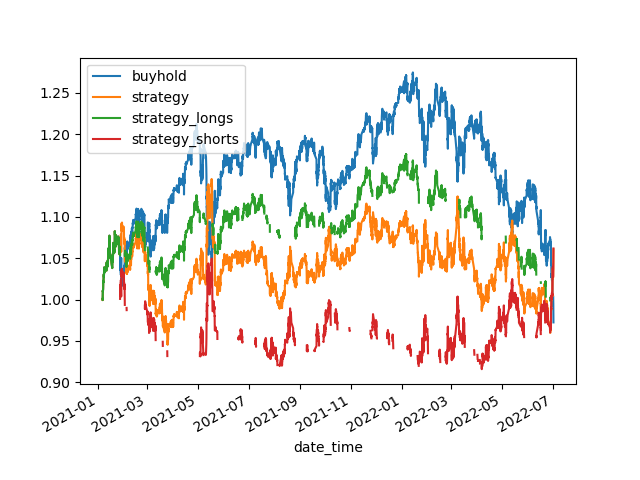

total # of trades: 98.0
Backtest finished in 0.4258615970611572s


In [44]:
# %matplotlib notebook
%matplotlib widget

klines_indicators_dict = pickle_klines()
df = klines_indicators_dict["SGX_TWN1!"].copy()
t0=time.time()
df1,trades = backtest(df,trd_fees=0.00, verbose=True).values()
t1=time.time()
print(f"Backtest finished in {t1-t0}s")
cols=list(df1.columns)
# cols_to_get = ['1h_tide','1h_close','positions',
#                "long_id","long_positions",'longUnPnl','longPnl',
#                "short_id","short_positions", 'shortUnPnl','shortPnl',
#                'Pnl', 'runningPnl', 'cum_runningPnl', 'longUnPnl','cum_longUnPnl','shortUnPnl', 'cum_shortUnPnl','UnPnl']
# check = df1[cols_to_get]

In [28]:
df.columns

Index(['1h_open', '1h_high', '1h_low', '1h_close', '1h_volume', '1h_closeTime',
       '1h_tide', '1h_tide_id', '1h_ebb', '1h_flow', '1h_MFI_14', '4h_open',
       '4h_high', '4h_low', '4h_close', '4h_volume', '4h_closeTime', '4h_tide',
       '4h_tide_id', '4h_ebb', '4h_flow', '4h_MFI_14', '24h_open', '24h_high',
       '24h_low', '24h_close', '24h_volume', '24h_closeTime', '24h_tide',
       '24h_tide_id', '24h_ebb', '24h_flow', '24h_MFI_14', '48h_open',
       '48h_high', '48h_low', '48h_close', '48h_volume', '48h_closeTime',
       '48h_tide', '48h_tide_id', '48h_ebb', '48h_flow', '48h_MFI_14'],
      dtype='object')

# SLOPES


# Scratch Pad

In [1]:
165/3


55.0

In [ ]:
6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

    
    
def backtest0(df0,trd_fees=0.0007, tf="1h"):
    df=df0.copy()
    # backtest related
    capital = 1000.0 # each ccyPair start with $1000
    
    np_positions = np.full(len(df), np.nan)
    acct_values = np.full(len(df), np.nan)
    np_ret = np.full(len(df), np.nan)
    long_ret = np.full(len(df), np.nan)
    short_ret = np.full(len(df), np.nan)
    holdDur = []
    
    np_positions = np.full(len(df), np.nan)
    forceCloseOut = True
    
    # signals related
    np_1h_tide = df['1h_tide'].values
    np_4h_tide = df['4h_tide'].values
    np_24h_tide = df['24h_tide'].values
    np_48h_tide = df['48h_tide'].values
    
    
    # last price
    np_closePx = df['1h_close'].values
    
    # initialize state flags
    isLong  = False
    isShort = False
    in_position  = False

    for idx_row in range(len(np_positions)):
            
        if not in_position:
            if np_1h_tide[idx_row] > 0: # symmZ 
                np_positions[idx_row] = 1   ## Open LONG position
                isLong = True
                in_position = True
                openIdx = idx_row
                
                entry_Px =  np_closePx[idx_row] 
            
            elif np_1h_tide[idx_row] < 0: # -symmZ: #
                np_positions[idx_row] = -1  ## Open SHORT position
                isShort = True
                in_position = True
                openIdx = idx_row
                
                entry_Px = np_closePx[idx_row] 
                
        else: # in_position == True
            if isLong: 
                if np_1h_tide[idx_row] < 0:# or (forceCloseOut and idx_row == len(np_signal)-1): # -symmZ 
                    np_positions[idx_row] = np.nan
                    isLong = False
                    in_position = False
                    holdDur.append(idx_row-openIdx)
                    
                    exit_Px = np_closePx[idx_row]
                    discrete_Long_ret = (exit_Px / entry_Px) - (2 * trd_fees) ## 2x trd_fees for entry & exit
                    capital = capital * discrete_Long_ret                         ## update the new capital value
                    acct_values[idx_row] = capital
                    np_ret[idx_row] = discrete_Long_ret - 1
                    long_ret[idx_row] = discrete_Long_ret - 1
                
                else:
                    np_positions[idx_row] = np_positions[idx_row-1]
                    acct_values[idx_row] = capital
                
            elif isShort:
                if np_1h_tide[idx_row] >0:# or (forceCloseOut and idx_row == len(np_signal)-1): # symmZ
                    np_positions[idx_row] = np.nan
                    isShort = False
                    in_position = False
                    holdDur.append(idx_row-openIdx)
                    
                    exit_Px = np_closePx[idx_row]
                    discrete_Short_ret = (entry_Px / exit_Px) - (2 * trd_fees) ## 2x trd_fees for entry & exit
                    capital = capital * discrete_Short_ret                         ## update the new capital value
                    acct_values[idx_row] = capital
                    np_ret[idx_row] = discrete_Short_ret - 1
                    short_ret[idx_row] = discrete_Short_ret - 1
                
                else:
                    np_positions[idx_row] = np_positions[idx_row-1]
                    acct_values[idx_row] = capital
                    
    # END BACKTEST, summarise
    n_trades = len(holdDur)
    print(f"total # of trades: {n_trades}")
        
    
    df['positions'] = np_positions # pd.DataFrame(np_positions,index=df.index)
    df['runningPnl'] = df['positions'].shift() * df['1h_close'].pct_change() 
    df["buyhold"] = df['1h_close'].pct_change() 
    

    
    #% Discrete PnL from each trade. cannot cumsum without replacing nan with 0...hence we create 'discretePnl_plot'
    
    df['discretePnl'] = np_ret
    df['longPnl'] = long_ret
    df['shortPnl'] = short_ret
    
    df['discretePnl'] = df['discretePnl'].fillna(0)  # needed to fillna(0) for cumsum in next step
    df['longPnl'] = df['longPnl'].fillna(0) 
    df['shortPnl'] = df['shortPnl'].fillna(0) 
    
    
    
    # takes into account PnL from minute-to-minute price variations
    
    df[["buyhold",
        "cum_discretePnl",
        "cum_runningPnl",
        "cum_longPnl",
        "cum_shortPnl"]]=df[["buyhold",
                             "discretePnl",
                             "runningPnl",
                             "longPnl",
                             "shortPnl"]].cumsum().apply(np.exp)
    
    
    # df['cumsum_discretePnl_plot'].plot(title=f'{pair} discretePnl cumsum')
    df["buyhold"].plot(label=f'buyhold')
    df['cum_runningPnl'].plot(label=f'strategy')
#     df['cum_discretePnl'].plot(label=f'discretePnl')
    df['cum_longPnl'].plot(label=f'strategy_longs')
    df['cum_shortPnl'].plot(label=f'strategy_shorts')
    plt.legend()
    plt.show()
    
    return df
